Please provide the path to your CSV file:


Enter file path:  D:\College\FDS Experiments\archive\Iris.csv



Dataset loaded successfully!
Shape: (150, 6)

Columns:
 ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

What would you like to do?
1️. See visualization for one variable
2️. See visualization for two variables
3️. See visualization for three variables


Enter your choice (1/2/3):  2
Enter first column name:  SepalLengthCm
Enter second column name:  PetalLengthCm


📈 Both numeric → showing scatter plot.


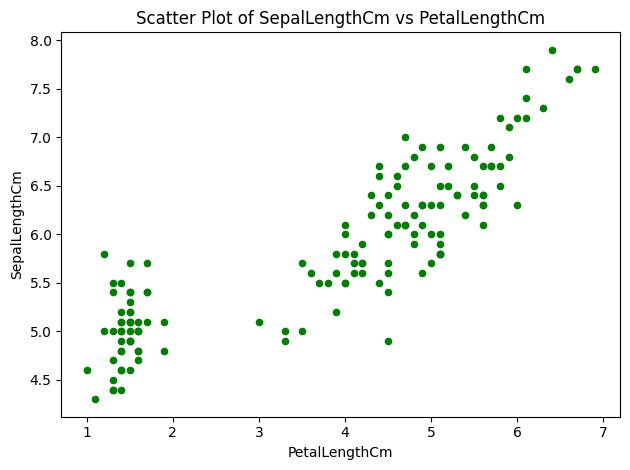

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


print("Please provide the path to your CSV file:")
file_path = input("Enter file path: ")

try:
    df = pd.read_csv(file_path)
    print("\nDataset loaded successfully!")
    print(f"Shape: {df.shape}")
    print("\nColumns:\n", df.columns.tolist())
except Exception as e:
    print("Error loading dataset:", e)
    exit()

print("\nWhat would you like to do?")
print("1️. See visualization for one variable")
print("2️. See visualization for two variables")
print("3️. See visualization for three variables")
choice = input("Enter your choice (1/2/3): ")


def is_num(col):
    return pd.api.types.is_numeric_dtype(df[col])


if choice == "1":
    col = input("Enter the column name: ")
    if col not in df.columns:
        print("Invalid column name.")
    elif is_num(col):
        df[col].hist(bins=20, color='skyblue', edgecolor='black')
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        print(f"{col} is numeric → showing histogram.")
    else:
        df[col].value_counts().plot(kind="bar", color='salmon')
        plt.title(f"Bar Chart of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        print(f"{col} is categorical → showing bar chart.")

elif choice == "2":
    col1 = input("Enter first column name: ")
    col2 = input("Enter second column name: ")

    if col1 not in df.columns or col2 not in df.columns:
        print("Invalid column names.")
    elif is_num(col1) and is_num(col2):
        df.plot.scatter(x=col2, y=col1, color='green')
        plt.title(f"Scatter Plot of {col1} vs {col2}")
        print("📈 Both numeric → showing scatter plot.")
    elif is_num(col1) and not is_num(col2):
        sns.boxplot(x=col2, y=col1, data=df)
        plt.title(f"Boxplot of {col1} by {col2}")
        print("Numeric vs Categorical → showing boxplot.")
    elif not is_num(col1) and is_num(col2):
        sns.boxplot(x=col1, y=col2, data=df)
        plt.title(f"Boxplot of {col2} by {col1}")
        print("Categorical vs Numeric → showing boxplot.")
    else:
        pd.crosstab(df[col1], df[col2]).plot(kind="bar", figsize=(8,5))
        plt.title(f"Grouped Bar Chart of {col1} vs {col2}")
        print("Both categorical → showing grouped bar chart.")

elif choice == "3":
    col1 = input("Enter first column: ")
    col2 = input("Enter second column: ")
    col3 = input("Enter third column: ")

    if not all(c in df.columns for c in [col1, col2, col3]):
        print("Invalid column names.")
    elif is_num(col1) and is_num(col2) and is_num(col3):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(df[col1], df[col2], df[col3], color='purple')
        ax.set_xlabel(col1)
        ax.set_ylabel(col2)
        ax.set_zlabel(col3)
        plt.title(f"3D Scatter Plot of {col1}, {col2}, and {col3}")
        print("All numeric → showing 3D scatter plot.")
    elif is_num(col1) and is_num(col2) and not is_num(col3):
        sns.scatterplot(x=col1, y=col2, hue=col3, data=df)
        plt.title(f"Scatter Plot of {col1} vs {col2} colored by {col3}")
        print("Two numeric and one categorical → scatter plot with hue.")
    elif is_num(col1) and not is_num(col2) and not is_num(col3):
        sns.boxplot(x=col2, y=col1, hue=col3, data=df)
        plt.title(f"Boxplot of {col1} by {col2} and {col3}")
        print("Numeric vs two categorical → showing boxplot with hue.")
    elif not is_num(col1) and not is_num(col2) and not is_num(col3):
        pd.crosstab([df[col1], df[col2]], df[col3]).plot(kind='bar', stacked=True)
        plt.title(f"Stacked Bar Chart of {col1}, {col2}, and {col3}")
        print("All categorical → showing stacked bar chart.")
    else:
        print("Combination not supported for automatic visualization.")

else:
    print("Invalid choice.")

plt.tight_layout()
plt.show()


NameError: name 'pippipppp' is not defined